## 0

In [321]:
import seaborn as sns
import numpy as np
import pandas as pd

df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [323]:
df[df["horsepower"].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [324]:
df.sort_values(by = "acceleration")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
11,14.0,8,340.0,160.0,3609,8.0,70,usa,plymouth 'cuda 340
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
116,16.0,8,400.0,230.0,4278,9.5,73,usa,pontiac grand prix
...,...,...,...,...,...,...,...,...,...
300,23.9,8,260.0,90.0,3420,22.2,79,usa,oldsmobile cutlass salon brougham
59,23.0,4,97.0,54.0,2254,23.5,72,europe,volkswagen type 3
326,43.4,4,90.0,48.0,2335,23.7,80,europe,vw dasher (diesel)
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup


In [325]:
from sklearn.linear_model import LinearRegression

X_train, y_train = df[~df["horsepower"].isna()][["displacement", "acceleration"]], df[~df["horsepower"].isna()]["horsepower"]
X_pred = df[df["horsepower"].isna()][["displacement", "acceleration"]]

In [326]:
linreg = LinearRegression()

linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_pred)

y_pred = np.round(y_pred)

y_pred

array([ 64., 100.,  68.,  95.,  78.,  73.])

In [327]:
df.loc[X_pred.index, "horsepower"] = y_pred

In [328]:
df.loc[X_pred.index]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,64.0,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,100.0,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,68.0,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,95.0,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,78.0,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,73.0,3035,20.5,82,usa,amc concord dl


In [329]:
df = pd.get_dummies(df.drop("name", axis = 1), columns = ["origin"])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1


In [330]:
from sklearn.model_selection import train_test_split

X, y = df.drop(["mpg"], axis = 1).values, df["mpg"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((318, 9), (40, 9), (40, 9), (318,), (40,), (40,))

In [331]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
#scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

In [332]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer, LeakyReLU
from tensorflow.keras.optimizers import SGD
import tensorflow as tf

def MLP(depth = 3):
    model = Sequential(name = "mlp")
    model.add(InputLayer(X_train.shape[1], name = "input_layer"))
    for i in range(depth):
        model.add(Dense(16, name = f"hidden{i}", activation = "relu"))
    model.add(Dense(1, name = "output"))
    
    model.compile(loss = "mean_squared_error", optimizer = SGD(learning_rate = .001))
    return model

model = MLP(5)
model.summary()

Model: "mlp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden0 (Dense)             (None, 16)                160       
                                                                 
 hidden1 (Dense)             (None, 16)                272       
                                                                 
 hidden2 (Dense)             (None, 16)                272       
                                                                 
 hidden3 (Dense)             (None, 16)                272       
                                                                 
 hidden4 (Dense)             (None, 16)                272       
                                                                 
 output (Dense)              (None, 1)                 17        
                                                                 
Total params: 1,265
Trainable params: 1,265
Non-trainable param

In [333]:
model.fit(scaled_X_train, y_train, epochs = 50, verbose = 1, validation_split = 0.2)

Epoch 1/50


2022-04-22 21:36:17.918538: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 2s 95ms/step - loss: 610.5447 - val_loss: 597.4834
Epoch 2/50
1/8 [==>...........................] - ETA: 0s - loss: 651.8855

2022-04-22 21:36:19.099780: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 15ms/step - loss: 585.9609 - val_loss: 569.1514
Epoch 3/50
8/8 [==============================] - 0s 9ms/step - loss: 550.6249 - val_loss: 517.5956
Epoch 4/50
8/8 [==============================] - 0s 10ms/step - loss: 443.9732 - val_loss: 196.3515
Epoch 5/50
8/8 [==============================] - 0s 8ms/step - loss: 61.3823 - val_loss: 23.9019
Epoch 6/50
8/8 [==============================] - 0s 9ms/step - loss: 24.6800 - val_loss: 11.8307
Epoch 7/50
8/8 [==============================] - 0s 7ms/step - loss: 12.2672 - val_loss: 9.6919
Epoch 8/50
8/8 [==============================] - 0s 7ms/step - loss: 10.6737 - val_loss: 10.8948
Epoch 9/50
8/8 [==============================] - 0s 7ms/step - loss: 10.8374 - val_loss: 8.5200
Epoch 10/50
8/8 [==============================] - 0s 7ms/step - loss: 12.7859 - val_loss: 10.3291
Epoch 11/50
8/8 [==============================] - 0s 6ms/step - loss: 9.1027 - val_loss: 7.9030
Epoch 12/50
8/8 [========

<AxesSubplot:>

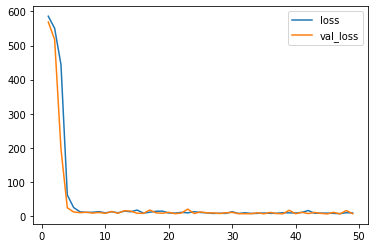

In [334]:
pd.DataFrame(model.history.history)[1:].plot()

In [335]:
y_pred = model.predict(scaled_X_test)

2022-04-22 21:36:50.703680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [336]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_squared_error(y_test, y_pred)

5.988700877488965

In [337]:
for a, b in zip(y_pred, y_test):
    print(a, b)

[28.480656] 27.0
[35.560886] 33.0
[27.382338] 22.0
[39.259155] 36.0
[15.238606] 16.0
[20.395554] 18.1
[15.509524] 15.0
[35.19966] 34.7
[13.497254] 14.0
[23.258045] 26.0
[28.361494] 25.0
[25.145657] 24.0
[36.143505] 34.4
[13.6737995] 16.0
[26.262688] 24.5
[35.8291] 36.0
[19.613766] 18.0
[34.622246] 33.0
[13.79126] 14.0
[24.811516] 26.8
[18.49209] 21.0
[19.57432] 23.0
[27.124296] 27.0
[21.917486] 25.0
[36.864803] 37.2
[22.583414] 23.0
[20.531116] 18.0
[27.12837] 23.5
[30.415125] 31.0
[26.18589] 29.0
[17.736858] 18.5
[19.04566] 17.0
[13.164279] 13.0
[21.350494] 22.0
[12.869728] 13.0
[39.972904] 31.0
[22.336336] 23.8
[43.936302] 44.0
[23.299358] 23.0
[14.983509] 15.0


In [348]:
from sklearn.ensemble import RandomForestRegressor

rndforest_reg = RandomForestRegressor()

rndforest_reg.fit(scaled_X_train, y_train)
y_pred_f = rndforest_reg.predict(scaled_X_test)

mean_squared_error(y_test, y_pred_f)

6.564188074999995

In [341]:
def MLP(depth, nodes):
    model = Sequential(name = "mlp")
    model.add(InputLayer(X_train.shape[1], name = "input_layer"))
    for i in range(depth):
        model.add(Dense(nodes, name = f"hidden{i}", activation = "relu"))
    model.add(Dense(1, name = "output"))
    
    model.compile(loss = "mean_squared_error", optimizer = SGD(learning_rate = .001))
    return model

In [342]:
layers_list = [1, 2, 3, 4, 5, 6, 8, 10, 16, 32]
nodes_list = [8, 16, 32, 64]

model = {}

y_pred = {}

result = []

es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 0, patience = 15)

for layers in layers_list:
    for nodes in nodes_list:
        model[f"{layers},{nodes}"] = MLP(layers, nodes)

        model[f"{layers},{nodes}"].fit(scaled_X_train, y_train, epochs = 50, verbose = 0, validation_split = 0.2, callbacks = [es])
        y_pred[f"{layers},{nodes}"] = model[f"{layers},{nodes}"].predict(scaled_X_test)
        result.append(f"{layers=}, {nodes=}, MSE: {mean_squared_error(y_test, y_pred[f'{layers},{nodes}'])}")
        model[f"{layers},{nodes}"] = 0


        
        

2022-04-22 21:37:55.006180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-22 21:37:55.441545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-22 21:37:57.361969: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-22 21:37:57.528193: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-22 21:37:57.988889: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-22 21:37:59.781769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-04-22 21:37:59.944094: I tensorflow/core/grappler/optimizers/cust

In [343]:
result

['layers=1, nodes=8, MSE: 6.950994100499736',
 'layers=1, nodes=16, MSE: 5.696677701654583',
 'layers=1, nodes=32, MSE: 5.094891702403813',
 'layers=1, nodes=64, MSE: 5.672424652787411',
 'layers=2, nodes=8, MSE: 4.980049684805019',
 'layers=2, nodes=16, MSE: 5.057296153989226',
 'layers=2, nodes=32, MSE: 5.057391134127336',
 'layers=2, nodes=64, MSE: 4.7611848849868945',
 'layers=3, nodes=8, MSE: 4.381769611715292',
 'layers=3, nodes=16, MSE: 7.898354789695878',
 'layers=3, nodes=32, MSE: 5.074674537167359',
 'layers=3, nodes=64, MSE: 4.556763226198752',
 'layers=4, nodes=8, MSE: 4.572015058097529',
 'layers=4, nodes=16, MSE: 5.4366123671891895',
 'layers=4, nodes=32, MSE: 4.532012239211893',
 'layers=4, nodes=64, MSE: 5.207887129803751',
 'layers=5, nodes=8, MSE: 13.369125438498244',
 'layers=5, nodes=16, MSE: 7.715641510127429',
 'layers=5, nodes=32, MSE: 24.63809200648016',
 'layers=5, nodes=64, MSE: 13.232306679520411',
 'layers=6, nodes=8, MSE: 4.806206068817692',
 'layers=6, nod

In [311]:
from keras.callbacks import EarlyStopping

In [344]:
model = MLP(4, 16)

es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 10)

model.fit(scaled_X_train, y_train, validation_split = 0.2, verbose = 1, epochs = 100, callbacks = [es])

Epoch 1/100


2022-04-22 21:41:19.497038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 1s 68ms/step - loss: 608.5586 - val_loss: 591.2037
Epoch 2/100
1/8 [==>...........................] - ETA: 0s - loss: 494.8488

2022-04-22 21:41:20.424792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


8/8 [==============================] - 0s 11ms/step - loss: 568.2785 - val_loss: 520.1135
Epoch 3/100
8/8 [==============================] - 0s 12ms/step - loss: 339.6090 - val_loss: 64.0503
Epoch 4/100
8/8 [==============================] - 0s 14ms/step - loss: 44.2861 - val_loss: 30.5532
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 23.0404 - val_loss: 13.3667
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 16.0451 - val_loss: 10.3312
Epoch 7/100
8/8 [==============================] - 0s 6ms/step - loss: 13.0062 - val_loss: 9.5978
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 11.5773 - val_loss: 9.4623
Epoch 9/100
8/8 [==============================] - 0s 6ms/step - loss: 10.8083 - val_loss: 10.3658
Epoch 10/100
8/8 [==============================] - 0s 8ms/step - loss: 10.5150 - val_loss: 12.4437
Epoch 11/100
8/8 [==============================] - 0s 6ms/step - loss: 11.6977 - val_loss: 9.5130
Epoch 12/100
8/8 